# Optimization of a state-to-state transfer in a lambda system with RWA

In [1]:
# NBVAL_IGNORE_OUTPUT
%load_ext watermark
import numpy as np
import scipy
import matplotlib
import matplotlib.pylab as plt
import krotov
import qutip
from qutip import Qobj
%watermark -v --iversions

qutip            4.3.1
krotov           0.2.0+dev
scipy            1.2.0
matplotlib       3.0.2
numpy            1.15.4
matplotlib.pylab 1.15.4
CPython 3.6.8
IPython 7.2.0


$\newcommand{tr}[0]{\operatorname{tr}}
\newcommand{diag}[0]{\operatorname{diag}}
\newcommand{abs}[0]{\operatorname{abs}}
\newcommand{pop}[0]{\operatorname{pop}}
\newcommand{aux}[0]{\text{aux}}
\newcommand{opt}[0]{\text{opt}}
\newcommand{tgt}[0]{\text{tgt}}
\newcommand{init}[0]{\text{init}}
\newcommand{lab}[0]{\text{lab}}
\newcommand{rwa}[0]{\text{rwa}}
\newcommand{bra}[1]{\langle#1\vert}
\newcommand{ket}[1]{\vert#1\rangle}
\newcommand{Bra}[1]{\left\langle#1\right\vert}
\newcommand{Ket}[1]{\left\vert#1\right\rangle}
\newcommand{Braket}[2]{\left\langle #1\vphantom{#2} \mid
#2\vphantom{#1}\right\rangle}
\newcommand{Ketbra}[2]{\left\vert#1\vphantom{#2}
\right\rangle \hspace{-0.2em} \left\langle #2\vphantom{#1}\right\vert}
\newcommand{op}[1]{\hat{#1}}
\newcommand{Op}[1]{\hat{#1}}
\newcommand{dd}[0]{\,\text{d}}
\newcommand{Liouville}[0]{\mathcal{L}}
\newcommand{DynMap}[0]{\mathcal{E}}
\newcommand{identity}[0]{\mathbf{1}}
\newcommand{Norm}[1]{\lVert#1\rVert}
\newcommand{Abs}[1]{\left\vert#1\right\vert}
\newcommand{avg}[1]{\langle#1\rangle}
\newcommand{Avg}[1]{\left\langle#1\right\rangle}
\newcommand{AbsSq}[1]{\left\vert#1\right\vert^2}
\newcommand{Re}[0]{\operatorname{Re}}
\newcommand{Im}[0]{\operatorname{Im}}
\newcommand{toP}[0]{\omega_{12}}
\newcommand{toS}[0]{\omega_{23}}
\newcommand{oft}[0]{\left(t\right)}$

The purpose of this example is to illustrate and test the use of complex control
fields.
Essentially, this is accomplished by rewriting the Hamiltonian as the
sum of two independent controls (real and imaginary parts).

## Define the Hamiltonian

The system consists of three levels $\Ket{1}$,
$\Ket{2}$ and $\Ket{3}$ with energy levels $E_{1}, E_{2}$ and $E_{3}$ which
interact with a pair of pulses,
with time-dependent frequencies of
$\omega_{P}=\omega_{P}\oft$ (pump laser) and 
$\omega_{S} = \omega_{S}\oft$
(stokes laser) respectively.
The pulses each have time-dependent envelopes
$\varepsilon_{P}\oft$ and $\varepsilon_{S}\oft$.
Furthermore, it is assumed that
the frequencies are tuned
such that $\omega_{P}=\omega_{P}\oft$ selectively
addresses
the $\Ket{1} \leftrightarrow \Ket{2}$ and 
$\omega_{S}=\omega_{S}\oft$
addresses the $\Ket{2} \leftrightarrow \Ket{3}$ transition.

We transform into
the interaction picture using the operator

$$\op{U}_{0} = \Ketbra{1}{1}
e^{-i\left(E_{2} - \omega_{P} \right)t} + \Ketbra{2}{2} e^{-iE_{2}t} +
\Ketbra{3}{3} e^{-i\left(E_{2}-\omega_{S}\right)t}\,\,,$$

where $\toP$ and
$\toS$, the splittings between the first and second and between the second and
third energy levels, are close to the central frequencies of $\omega_{S}\oft$
and $\omega_{P}\oft$.

In the rotating wave approximation, the fast rotating
terms
$e^{\pm i\left(\toP + \omega_{P}\oft \right)t}$ and 
$e^{\pm i\left(\toS +
\omega_{S}\oft \right)t}$ can be neglegted.
 
Consequently,

$$ \op{H}_{0} =
\Delta_{P} \Ketbra{1}{1}  +\Delta_{S} \Ketbra{3}{3}$$

describes the drift
Hamiltonian of a system with the respective detunings $\Delta_{P}=E_{1} +
\omega_{P} - E_{2}$ and $\Delta_{S} = E_{3} + \omega_{S} -E_{2}$.

The control
Hamiltonian is given by 

$$    \op{H}_{1}\oft = \op{H}_{1,P}\oft +
\op{H}_{1,S}\oft = \Omega_{P}\oft \Ketbra{1}{2} + \Omega_{S}\oft\Ketbra{2}{3} +
\text{h.c.}\,\,,$$

where $\Omega_{P} = \Omega_{P}\oft = \frac{\mu_{21}
\varepsilon_{P}\oft}{2} e^{-i\Phi_{P}\oft t}$ and
$\Omega_{S} = \Omega_{S}\oft =
\frac{\mu_{23} \varepsilon_{S}\oft}{2} e^{-i\Phi_{S}\oft t}$
with the phases
$\Phi_{P}\oft = \toP - \omega_{P}\oft$ and $\Phi_{S}\oft = \toS -
\omega_{S}\oft$
and $\mu_{ij}$ the $ij^{\text{th}}$ dipole-transition moment.
In order to optimize, we rewrite $\Omega_{P}\oft = \Omega_{P}^\text{Re}\oft +
i\Omega_{P}^\text{Im}\oft$
and $\Omega_{S}\oft = \Omega_{S}^\text{Re}\oft +
i\Omega_{S}^\text{Im}\oft$, such that optimization of the pulses involves only
real functions.


## About the target transformation in the RWA

Since we are working in the interaction picture with the RWA we have to convert
the states from the lab frame to the rotating frame. This is made by 
following the next equation 

$$ \ket{\psi _{I}} = \op{U}_{0} ^{-1}\ket{\psi}, $$

with $\op{U}_0$ the free evolution operator defined before. 

The initial states are defined at $t = 0$ and thus they remain the same in the 
rotating frame, but the target states may change. In our example, the 
target state is an eigenstate, and thus in the RWA frame it will be the same, 
except for a phase. However this phase will be overlooked by the functional that we are using. 
Nevertheless it is important to have this transformation in mind, specially if we
are dealing with targets that are not pure eigenstates or if we are interested in 
creating a gate optimization.

In [2]:
T = 5. 

def ham_and_states(T = T):
    """Lambda-system Hamiltonian"""
    E1 = 0.
    E2 = 10.
    E3 = 5.
    ω_P = 9.5
    ω_S = 4.5
    Ω_init = 5.
    H0 =  Qobj([[E1+ω_P-E2, 0., 0.], \
                [0., 0., 0.],        \
                [0., 0., E3+ω_S-E2]])
    
        
    H1P_re = Qobj([[0.,-1.,0.], [-1.,0.,0.],[0.,0.,0.]])    
    H1P_im = Qobj([[0.,-1.j,0.],[1.j,0.,0.],[0.,0.,0.]])
    ΩP_re = lambda t, args: Ω_init
    ΩP_im = lambda t, args: Ω_init
    
    H1S_re = Qobj([[0.,0.,0.],[0.,0.,1.],[0.,1.,0.]])
    H1S_im = Qobj([[0.,0.,0.],[0.,0.,1.j],[0.,-1.j,0.]])
    ΩS_re = lambda t, args: Ω_init    
    ΩS_im = lambda t, args: Ω_init
    
    """Initial and target states"""
    psi0 = qutip.Qobj(np.array([1.,0.,0.]))
    psi1 = qutip.Qobj(np.array([0.,0.,1.]))    
    
    #State transformation to the rotating frame
    psi1 *= np.exp(1j * (E2 - ω_S) * T)
    
    return ([H0, \
            [H1P_re, ΩP_re], [H1P_im, ΩP_im], \
            [H1S_re, ΩS_re], [H1S_im, ΩS_im]], \
            psi0, psi1)

H, psi0, psi1 = ham_and_states()

We introduce projectors for each of the three energy levels
$\op{P}_{i} =
\Ketbra{i}{i}$

In [3]:
proj1 = Qobj([[1.,0.,0.],[0.,0.,0.],[0.,0.,0.]])
proj2 = Qobj([[0.,0.,0.],[0.,1.,0.],[0.,0.,0.]])
proj3 = Qobj([[0.,0.,0.],[0.,0.,0.],[0.,0.,1.]])

## Define the optimization target

In the following we consider dynamics acting
over a duration of $\Delta_{t} = 5$, beginning at
$t_{0} = 0$ and ending at $T =
\Delta_{t}$. 
The time grid is divided into $n_{t} = 500$ equidistant time
steps.

In [4]:
tlist = np.linspace(0.,T,500)

Since the objective of this example is a state to state transfer from the
initial state
$\Ket{\Psi_{\init}} = \Ket{1}$ into the final state
$\Ket{\Psi_{\tgt}} = \Ket{3}$ at the
final time $t_{1}$, the optimization
objective is set as

In [5]:
objective = krotov.Objective(initial_state=psi0, target=psi1, H=H)

## Initial guess shapes
"Stimulated Raman adiabatic passage" (STIRAP) is a
process in which population in $\Ket{1}$ is transferred into
$\Ket{3}$ without
having to pass through $\Ket{2}$ (which could for instance be a rapidly decaying
level).
In order for this process to occur, a temporally finite Stokes pulse of
sufficient amplitude driving the $\Ket{2} \leftrightarrow \Ket{3}$ transition is
applied first, whilst second pump pulse of similar intensity follows some time
later such that the pulses still have a partial temporal overlap.

In order to
demonstrate the Krotov's optimization method however, we choose an initial guess
consisting of two low intensity and real Blackman pulses which are temporally
disjoint.

For the real components of the matrix elements, we supply our guess
pulses shaped as Blackman window functions `S(t,offset)`, with an offset
ensuring that the two pulses don't overlap.
The imaginary components are coupled
to pulses that are zero at all times.

In [6]:
def S(t,offset):
    """Shape envelope function for the field update"""
    return krotov.shapes.blackman(t,1.+offset,4.+offset)

def shape_field_real(eps,offset):
    """Applies the total pulse shape to the real part of a guess pulse"""
    field_shaped = lambda t, args: eps(t, args)*S(t,offset)
    return field_shaped

def shape_field_imag(eps,offset):
    """Initializes the imaginary parts of the guess pulses to zero"""
    field_shaped = lambda t, args: eps(t, args)*0.
    return field_shaped

H[1][1] = shape_field_real(H[1][1],1.) # Re[Ωₚ]
H[2][1] = shape_field_imag(H[2][1],1.) # Im[Ωₚ]
H[3][1] = shape_field_real(H[3][1],-1.) # Re[Ωₛ]
H[4][1] = shape_field_imag(H[4][1],-1.) # Im[Ωₛ]

We choose an appropriate update factor $\lambda_{a}$ for the problem at hand and
make sure Krotov considers pulses which start and end with zero amplitude.

In [7]:
def update_shape(t):
    """Scales the Krotov methods update of the pulse value at the time t"""
    return krotov.shapes.flattop(t,0.,5.,0.3,func='sinsq')

In [8]:
opt_lambda = 2.
pulse_options = { 
    H[1][1]: dict(lambda_a=opt_lambda, shape=update_shape),
    H[2][1]: dict(lambda_a=opt_lambda, shape=update_shape),
    H[3][1]: dict(lambda_a=opt_lambda, shape=update_shape),
    H[4][1]: dict(lambda_a=opt_lambda, shape=update_shape)
}

## Simulate dynamics of the guess field

In [9]:
def plot_pulse(pulse, tlist, label):
    fig, ax = plt.subplots()
    if callable(pulse):
        pulse = np.array([pulse(t, args=None) for t in tlist])
    ax.plot(tlist, pulse)
    ax.set_xlabel('time')
    ax.set_ylabel('%s pulse amplitude' % label)
    plt.show(fig)

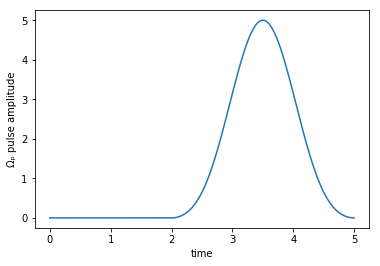

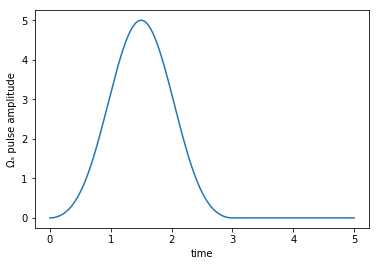

In [10]:
plot_pulse(H[1][1], tlist, 'Ωₚ')
plot_pulse(H[3][1], tlist, 'Ωₛ')

The imaginary parts are zero:

In [11]:
assert np.all([H[2][1](t, None) == 0 for t in tlist])
assert np.all([H[4][1](t, None) == 0 for t in tlist])

After assuring ourselves that our guess pulses appear as expected, we propagate
the system using our guess. Since the pulses are temporally disjoint, we expect
the first pulse to have no effect, whilst the second merely transfers population
out of $\Ket{1}$ into $\Ket{2}$ and back again.

In [12]:
guess_dynamics = objective.mesolve(tlist, e_ops=[proj1,proj2,proj3])

In [13]:
def plot_population(result):
    fig, ax = plt.subplots()
    ax.plot(result.times, result.expect[0], label='1')
    ax.plot(result.times, result.expect[1], label='2')
    ax.plot(result.times, result.expect[2], label='3')
    ax.legend()
    ax.set_xlabel('time')
    ax.set_ylabel('population')
    plt.show(fig)

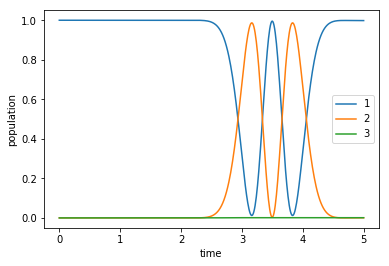

In [14]:
plot_population(guess_dynamics)

## Optimize
We now supply Krotov with all the information it needs to optimize,
consisting of the `objectives` (maximize population in $\Ket{3}$ at $t_{1}$),
`pulse_options` (the initial shapes of our pulses and how they may be changed)
as well as the `propagator` to use, optimization functional (`chi_constructor`),
`info_hook` (processing occuring inbetween iterations of optimization) and the
maximum number of iterations to perform, `iter_stop`. We will stop the
optimization when the error goes below $10^{-3}$ or the fidelity has converged
to within 5 digits.

In [15]:
oct_result = krotov.optimize_pulses(
    [objective],
    pulse_options,
    tlist,
    propagator=krotov.propagators.expm,
    chi_constructor=krotov.functionals.chis_ss,
    info_hook=krotov.info_hooks.print_table(
        J_T=krotov.functionals.J_T_ss,
        show_g_a_int_per_pulse=True,
        unicode=False,
    ),
    check_convergence=krotov.convergence.Or(
        krotov.convergence.value_below(1e-3, name='J_T'),
        krotov.convergence.delta_below(1e-5),
        krotov.convergence.check_monotonic_error,
    ),
    iter_stop=15,
)

  iter.        J_T   g_a_int_1   g_a_int_2   g_a_int_3   g_a_int_4     g_a_int          J  Delta_J_T    Delta J  secs
      0   9.99e-01    0.00e+00    0.00e+00    0.00e+00    0.00e+00    0.00e+00   9.99e-01        n/a        n/a     0
      1   9.96e-01    2.23e-04    2.29e-06    2.22e-04    2.28e-06    4.50e-04   9.97e-01  -2.53e-03  -2.08e-03     2
      2   9.88e-01    7.40e-04    1.14e-05    7.36e-04    1.13e-05    1.50e-03   9.89e-01  -8.48e-03  -6.98e-03     2
      3   9.60e-01    2.44e-03    3.96e-05    2.41e-03    3.84e-05    4.93e-03   9.65e-01  -2.78e-02  -2.28e-02     2
      4   8.75e-01    7.72e-03    1.26e-04    7.38e-03    1.15e-04    1.53e-02   8.91e-01  -8.50e-02  -6.96e-02     2
      5   6.62e-01    2.11e-02    3.48e-04    1.85e-02    2.76e-04    4.02e-02   7.03e-01  -2.13e-01  -1.73e-01     2
      6   3.32e-01    3.91e-02    6.62e-04    2.84e-02    4.05e-04    6.86e-02   4.01e-01  -3.30e-01  -2.62e-01     2
      7   9.83e-02    3.37e-02    5.85e-04    1.95e-02  

In [16]:
oct_result

Krotov Optimization Result
--------------------------
- Started at 2019-02-15 13:09:55
- Number of objectives: 1
- Number of iterations: 10
- Reason for termination: Reached convergence: J_T < 0.001
- Ended at 2019-02-15 13:10:18

We appear to have found pulse-shapes that fulfill our objective, but what do
they look like?

pump pulse amplitude and phase:


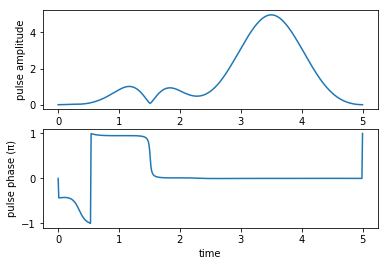

Stokes pulse amplitude and phase:


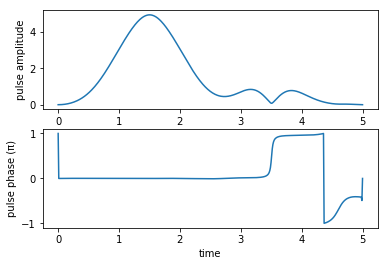

In [17]:
def plot_pulse_amplitude_and_phase(pulse_real, pulse_imaginary,tlist):
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    amplitudes = [np.sqrt(x*x + y*y) for x,y in zip(pulse_real,pulse_imaginary)]
    phases = [np.arctan2(y,x)/np.pi for x,y in zip(pulse_real,pulse_imaginary)]
    ax1.plot(tlist,amplitudes)
    ax1.set_xlabel('time')
    ax1.set_ylabel('pulse amplitude')
    ax2.plot(tlist,phases)
    ax2.set_xlabel('time')
    ax2.set_ylabel('pulse phase (π)')    
    plt.show()
    
print("pump pulse amplitude and phase:")
plot_pulse_amplitude_and_phase(
    oct_result.optimized_controls[0], oct_result.optimized_controls[1], tlist)
print("Stokes pulse amplitude and phase:")
plot_pulse_amplitude_and_phase(
    oct_result.optimized_controls[2], oct_result.optimized_controls[3], tlist)

And how does the population end up in $\Ket{3}$?

In [18]:
opt_dynamics = oct_result.optimized_objectives[0].mesolve(
    tlist, e_ops=[proj1, proj2, proj3])

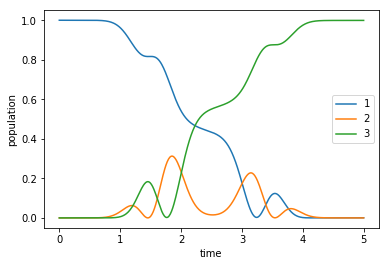

In [19]:
plot_population(opt_dynamics)